In [1]:
import numpy as np
import pandas as pd

import semopy as sem

Lab data 1 has data for a personality questionnaire based on the five factor model of personality i.e. extraversion, neuroticism, intellect, agreeableness and conscientiousness. A researcher had collected data on this measure from 1481 people and was interested in testing whether the questionnaire accurately reflected the five factor model. In the dataset, you will see that there are 4 questionnaire items that are presumed to measure each of the five factors (so 20 items altogether – see the dataset for detail). Each item in the dataset is labelled with the factor it should measure e.g.  Ext 1-4 for the 4 Extraversion items.

Q1 Familarise yourself with the dataset by opening the file in Jamovi or Excel and spending a few moments examining the dataset. You could also use the describe function in R that we looked at in the lab worksheet last week.

In [3]:
fa_df = pd.read_spss('lab_data_1.sav')

In [4]:
fa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   p3_age     1481 non-null   float64 
 1   p3_gender  1481 non-null   category
 2   Ext1       1481 non-null   float64 
 3   Ag1        1481 non-null   float64 
 4   C1         1481 non-null   float64 
 5   Neu1       1481 non-null   float64 
 6   Int1       1481 non-null   float64 
 7   Ext2       1481 non-null   float64 
 8   Ag2        1481 non-null   float64 
 9   C2         1481 non-null   float64 
 10  Neu2       1481 non-null   float64 
 11  Int2       1481 non-null   float64 
 12  Ext3       1481 non-null   float64 
 13  Ag3        1481 non-null   float64 
 14  C3         1481 non-null   float64 
 15  Neu3       1481 non-null   float64 
 16  Int3       1481 non-null   float64 
 17  Ext4       1481 non-null   float64 
 18  Ag4        1481 non-null   float64 
 19  C4         1481 non-null   

In [5]:
fa_df.describe()

,p3_age,Ext1,Ag1,C1,Neu1,Int1,Ext2,Ag2,C2,Neu2,...,Ext4,Ag4,C4,Neu4,Int4,ext,agree,consc,neu,int
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,...,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000
mean,24.432816,2.926401,4.273464,2.929102,2.930452,4.004051,3.624578,4.099257,3.224848,2.615800,...,3.277515,4.300473,3.452397,3.271438,4.189061,12.988521,16.575962,13.228224,11.805537,15.813639
std,8.337135,1.095747,0.893765,1.251905,1.348632,1.104039,1.242617,1.096188,1.373033,1.163171,...,1.178335,0.936962,1.163317,1.247398,1.059405,3.825484,2.849337,3.528730,3.719379,3.114977
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000
25%,19.000000,2.000000,4.000000,2.000000,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,...,2.000000,4.000000,3.000000,2.000000,4.000000,10.000000,15.000000,11.000000,9.000000,14.000000
50%,21.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,...,3.000000,5.000000,4.000000,3.000000,5.000000,13.000000,17.000000,13.000000,12.000000,16.000000
75%,26.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,5.000000,16.000000,19.000000,16.000000,14.000000,18.000000
max,99.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,20.000000,20.000000,20.000000,20.000000,20.000000


Now we are going to construct the CFA model using lavaan. In lavaan, we create latent variables using the =~ symbol; this symbol is shorthand for 'is measured by', and has the general form: latent variable =~ indicator 1 + indicator2 + indicator 3  
  
Q3.	We want to create a CFA model that has each of the specified four questionnaire items loading on a latent factor for each of the five personality factors e.g. the four extraversion items loading on an extraversion latent factor and so on. To do this, try the following syntax:  

cfa_model = ' extraversion =~ Ext1 + Ext2 + Ext3 + Ext4  
               agreeableness =~ Ag1 + Ag2 + Ag3 + Ag4  
               conscientiousness =~ C1 + C2 + C3 + C4  
               neuroticism =~ Neu1 + Neu2 + Neu3 + Neu4  
               Intellect =~ Int1 + Int2 + Int3 + Int4'  
This defines our model called 'cfa_model'.  


In [16]:
model_description = """
extraversion =~ Ext1 + Ext2 + Ext3 + Ext4
agreeableness =~ Ag1 + Ag2 + Ag3 + Ag4
conscientiousness =~ C1 + C2 + C3 + C4
neuroticism =~ Neu1 + Neu2 + Neu3 + Neu4
intellect =~ Int1 + Int2 + Int3 + Int4
"""
mod = sem.Model(model_description)
res = mod.fit(sem_df)
print(res) 

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.001
Number of iterations: 37
Params: 1.125 1.122 1.264 1.051 1.151 0.980 1.263 0.791 0.815 0.773 0.875 0.689 0.635 0.593 1.047 0.854 0.935 0.816 0.807 0.972 0.450 0.969 0.458 0.473 0.605 0.619 0.921 0.992 0.981 1.129 0.925 0.565 0.537 0.946 0.842 0.325 0.028 0.115 0.005 0.613 0.074 -0.093 0.130 -0.021 0.573 -0.032 -0.117 0.581 -0.243 0.896


In [17]:
mod.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Ext1,~,extraversion,1.000000,-,-,-
1,Ext2,~,extraversion,1.125402,0.049599,22.690112,0.0
2,Ext3,~,extraversion,1.121509,0.051067,21.961437,0.0
3,Ext4,~,extraversion,1.264198,0.050238,25.164365,0.0
4,Ag1,~,agreeableness,1.000000,-,-,-
5,Ag2,~,agreeableness,1.050668,0.069035,15.219258,0.0
6,Ag3,~,agreeableness,1.151378,0.068458,16.81875,0.0
7,Ag4,~,agreeableness,0.979809,0.061014,16.058742,0.0
8,C1,~,conscientiousness,1.000000,-,-,-
9,C2,~,conscientiousness,1.262575,0.081105,15.567097,0.0


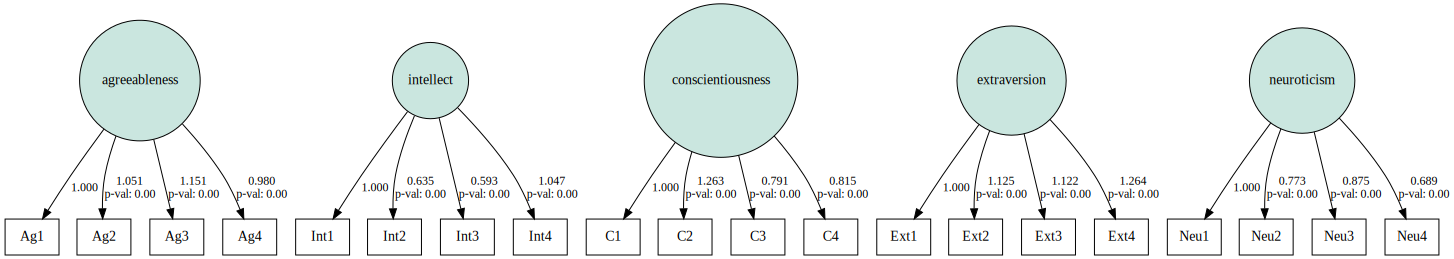

In [18]:
sem.semplot(mod, 'results//cfa.png')

Q4 Now we want to check the fit statistics and parameter estimates for this model. 

In [19]:
sem.calc_stats(mod)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,160,190,1482.243385,0.0,7564.377851,0.820698,0.80405,0.767309,0.80405,0.787078,0.074725,97.998321,363.021962,1.00084
